In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)


2.12.0
sys.version_info(major=3, minor=9, micro=7, releaselevel='final', serial=0)
matplotlib 3.7.2
numpy 1.23.5
pandas 2.0.3
sklearn 1.2.2
tensorflow 2.12.0
keras.api._v2.keras 2.12.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

In [3]:
# x_train.reshape(-1, 1) 的结果是一个形状为 (n, 1) 的二维数组，其中 n 是 x_train 中元素的总数。
#即变成一列向量

# StandardScaler 是 Scikit-learn（sklearn）库中的一个预处理类，用于将数据进行标准化处理。标准化是一种常见的数据预处理技术，可以使数据的特征在统计上具有零均值和单位方差。这有助于确保不同特征之间的尺度差异不会对机器学习模型的训练产生负面影响。
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_valid_scaled=scaler.transform(x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test_scaled=scaler.transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

In [4]:
model=keras.models.Sequential(
    [
        keras.layers.Flatten(input_shape=[28,28]),
        keras.layers.Dense(300,activation='relu'),
        keras.layers.Dense(100,activation='relu'),
        keras.layers.Dense(10,activation='softmax')
    ]
)
model.compile(loss="sparse_categorical_crossentropy",optimizer=keras.optimizers.SGD(0.001),metrics=["accuracy"])


In [5]:
history = model.fit(x_train_scaled, y_train, epochs=20,
                    validation_data=(x_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8964 - accuracy: 0.7029 - val_loss: 0.6170 - val_accuracy: 0.7942

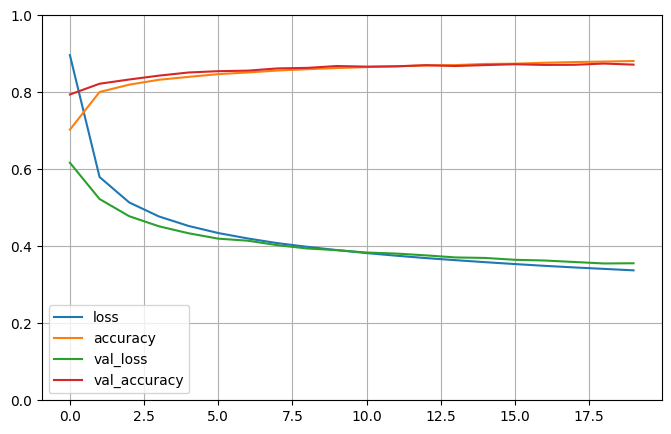

In [6]:

def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

In [7]:
model.evaluate(x_test_scaled, y_test, verbose=0)

[0.389852911233902, 0.8604000210762024]